# ROC on openpifpaf

In [116]:
from matplotlib import pyplot as plt
import numpy as np

def plot_roc(current_result, label, ax=None):
    ax = ax or plt.figure().gca()
    x = current_result["FP"]/(current_result["FP"]+current_result["TN"])
    y = current_result["TP"]/(current_result["TP"]+current_result["FN"])
    ax.plot(x, y, linestyle="-", linewidth=1, markersize=5, marker=".", label=label)
    index=10
    ax.plot(x[index], y[index], markersize=10, marker=".", color="green")
    ax.set_xlabel("FP rate")
    ax.set_ylabel("TP rate")
    ax.axis("equal")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_box_aspect(1)
    ax.set_title(f"ROC ball detection from PIFPAF")
    ax.legend()
    return ax


def plot_roc(metrics, x_label, y_label, label, ax=None):
    ax = ax or plt.figure().gca()
    x = metrics[x_label]
    y = metrics[y_label]
    ax.plot(x, y, linestyle="-", linewidth=1, markersize=5, marker=".", label=label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.axis("equal")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_box_aspect(1)
    ax.set_title(f"ROC ball detection from PIFPAF")
    ax.legend()
    return ax

In [5]:
from matplotlib import pyplot as plt
def plot_F1(current_result, label, ax=None):
    ax = ax or plt.figure().gca()
    n_points = current_result["TP"].size
    x = np.linspace(0,1,n_points)
    y = current_result["TP"]/(current_result["TP"]+0.5*(current_result["FP"]+current_result["FN"]))
    ax.plot(x, y, linestyle="-", linewidth=1, markersize=5, marker=".", label=label)
    index=10
    ax.plot(x[index], y[index], markersize=10, marker=".", color="green")
    ax.set_xlabel("threshold")
    ax.set_ylabel("F1 score")
    ax.axis("equal")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_box_aspect(1)
    ax.set_title(f"F1 score for ball detection")
    ax.legend()
    return ax

In [120]:
a = np.array([0,1,2,3.5,5.2])
print(a)
print(a+[a[-1]])

[0.  1.  2.  3.5 5.2]
[ 5.2  6.2  7.2  8.7 10.4]


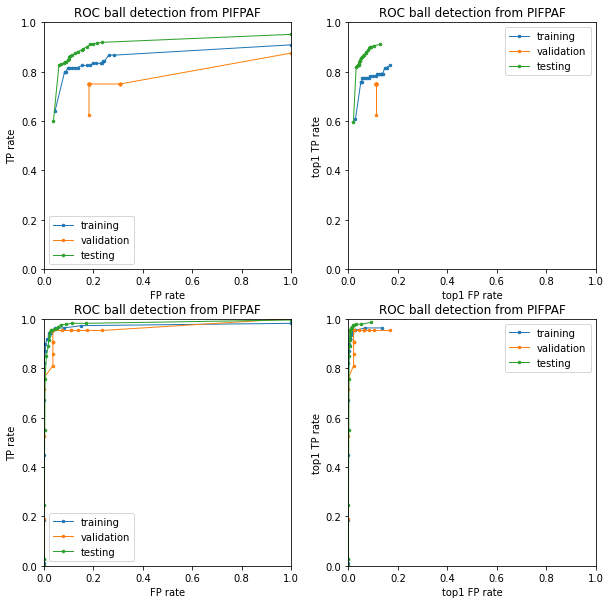

In [119]:
import pickle

filename = "results/resnet50-210313-090501.923457-cifcent-pan-ball-edge641.pkl.epoch247_ball_tmp_results.pickle"
fig, axes = plt.subplots(2,2, figsize=(10,10))

for i, filename in enumerate([
    "outputs/resnet50-210401-101841.678553-ball-edge641.pth.epoch100_ball_tmp_results.pickle",
    "outputs/resnet50-210312-102243.434563-ball-edge641.pkl.epoch100_ball_tmp_results.pickle"
]):
    result = pickle.load(open(filename, "rb"))

    for subset_name in result:
        #plot_F1(result[subset_name], subset_name, axes[0])
        plot_roc(result[subset_name]["metrics"], x_label="FP rate", y_label="TP rate", label=subset_name, ax=axes[i,0])
        plot_roc(result[subset_name]["top1_metrics"], x_label="top1 FP rate", y_label="top1 TP rate", label=subset_name, ax=axes[i,1])

In [ ]:
300 images avec human masks => training (split aléatoire 15% testing, 15% validation, 70% training)

1700 images - 300 ac human masks => testing ~1400 images
training

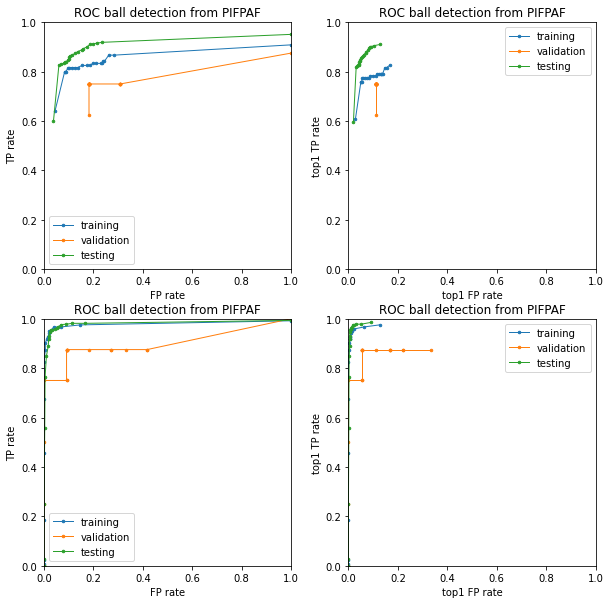

In [118]:
import pickle

filename = "results/resnet50-210313-090501.923457-cifcent-pan-ball-edge641.pkl.epoch247_ball_tmp_results.pickle"
fig, axes = plt.subplots(2,2, figsize=(10,10))

for i, filename in enumerate([
    "outputs/resnet50-210401-101841.678553-ball-edge641.pth.epoch100_ball_tmp_results.pickle",
    "outputs/resnet50-210312-102243.434563-ball-edge641.pkl.epoch100_ball_tmp_results.pickle"
]):
    result = pickle.load(open(filename, "rb"))

    for subset_name in result:
        #plot_F1(result[subset_name], subset_name, axes[0])
        plot_roc(result[subset_name]["metrics"], x_label="FP rate", y_label="TP rate", label=subset_name, ax=axes[i,0])
        plot_roc(result[subset_name]["top1_metrics"], x_label="top1 FP rate", y_label="top1 TP rate", label=subset_name, ax=axes[i,1])

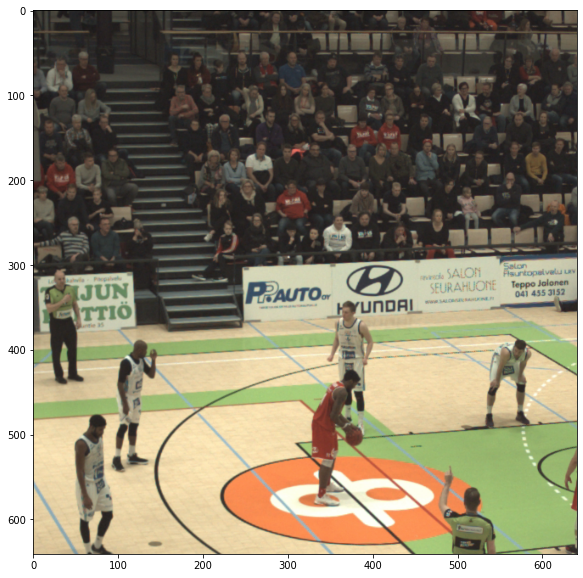

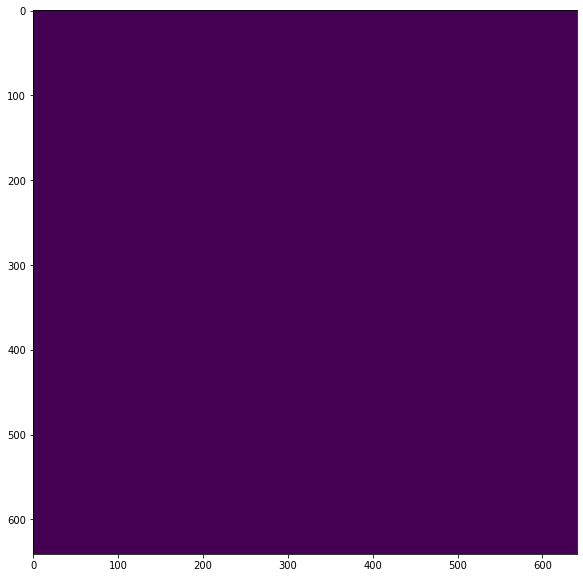

In [112]:
from matplotlib import pyplot as plt
import imageio
img = imageio.imread("image/tmp_image_ball_metric.png")
acc = imageio.imread("image/test.accumulated.png")
plt.figure(figsize=(10,10)).gca().imshow(img)
plt.figure(figsize=(10,10)).gca().imshow(acc)
